# T3 Wrangling Data with Python 

We will work with three very different data-sets in today's tutorial : 

1. An image (file : `gcamp7.bmp`)
2. A text (file : `gospel-of-buddha.txt`)
3. Tabular data  (file : `time-series2.xls`)

We will load each of these data-sets, understand the content and structure of the data and display it in a sensible way. Note that all three accompanying files need to be downloaded from the github repository. 


## Working with an image

Our image is in the bitmap format which has the file ending `.bmp`. We can use `matplotlib` to load the image. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
img = plt.imread('gcamp7.bmp')

Let's first try to understand the structure of the data. In other words, let's try to understand how the image information is represented in the data structure?

In [2]:
np.shape(img)

(2048, 2048, 4)

The image dimensions are 2048x2048 pixels and each pixel value is encoded by 4 numbers, representing red, green, blue and transparency of the pixel. 

Let's plot the image. We can use the matplotlib function `plt.imshow()` for this. 

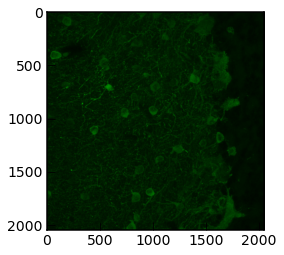

In [3]:
plt.imshow(img)

Now, let's extrat the only channel containing information. Which channel 

In [10]:
img[:,:,2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

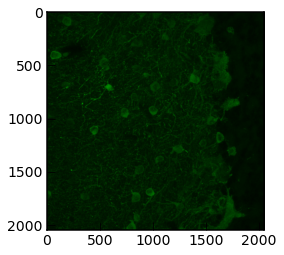

In [8]:
img[:,:,3] = 255
plt.imshow(img)

Now, let's extrat the only channel containing information. Which channel contains the information and how to access it? Let's save it in new variable called `img2` and plot it. 

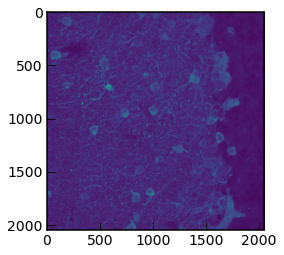

In [9]:
img2 = np.copy(img[:,:,1])
plt.imshow(img[:,:,1])

We next want to get an idea about the distribution of brightness levels in the new image (`img2`). Let's plot the histogram for that pupose using the matplotlib function `plt.hist()`. Chose an appropriate number of bins with the argument `bins=...` in the `plt.hist()` function. <br> <b>Attention!</b> The image needs to be flattened for this purpose (try `img2.flatten()` for that purpose).

(array([2.22560e+04, 5.07180e+04, 6.03330e+04, 1.49919e+05, 1.49972e+05,
        3.09491e+05, 2.54904e+05, 4.23226e+05, 2.85080e+05, 4.03250e+05,
        3.56323e+05, 2.06932e+05, 2.67524e+05, 1.51699e+05, 1.94392e+05,
        1.10010e+05, 1.40266e+05, 7.91620e+04, 1.01630e+05, 5.74930e+04,
        7.35180e+04, 6.07420e+04, 3.43140e+04, 4.40260e+04, 2.50630e+04,
        3.14240e+04, 1.82210e+04, 2.32350e+04, 1.29930e+04, 1.66750e+04,
        1.39780e+04, 7.74000e+03, 1.01400e+04, 5.66900e+03, 7.24600e+03,
        3.92100e+03, 5.25800e+03, 2.88600e+03, 3.71800e+03, 2.23600e+03,
        2.68300e+03, 2.24300e+03, 1.31100e+03, 1.66900e+03, 9.28000e+02,
        1.16800e+03, 6.51000e+02, 8.59000e+02, 5.45000e+02, 1.03600e+03,
        6.10000e+02, 3.79000e+02, 4.33000e+02, 2.59000e+02, 3.01000e+02,
        1.77000e+02, 2.20000e+02, 1.55000e+02, 1.65000e+02, 8.40000e+01,
        1.12000e+02, 1.22000e+02, 5.70000e+01, 8.30000e+01, 4.60000e+01,
        7.20000e+01, 3.30000e+01, 4.80000e+01, 3.40

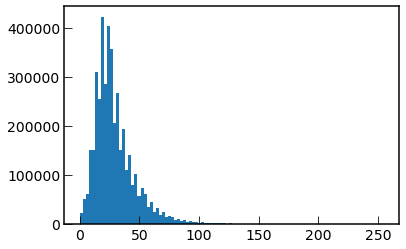

In [10]:
plt.hist(img2.flatten(),bins=100)

Let's extract the brightest regions. Which percentage of pixels contain brightness levels above 60, for example? 

In [11]:
print(np.sum(img2[:]>60)/(2048**2))

0.05266571044921875


That means that 5.3 % of the pixels have brightness levels which are larger than 60. 

Lastly, let's plot the image by setting the pixel with brightness level above 60 to 255 and the remaining pixels to 0. 

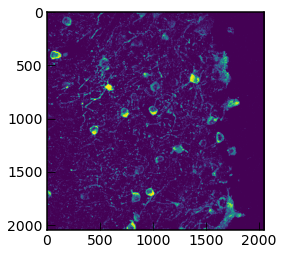

In [12]:
img2[img2[:]>60] = 255
img2[img2[:]<60] = 0
plt.imshow(img2)

## Working with texts 

We will work the the text of the book : 
- The Gospel of Buddha, by Paul Carus (Only because I could find that text easily online.)

The below code opens the text file, reads its content and splits the content into individual words based on the space between the words. 

In [11]:
file_path = 'gospel-of-buddha.txt'
file =  open(file_path, 'r',encoding='utf8')   # open the text file as read-only 
text = file.read()             # reads the entire text contained in the file
words = text.split()           # splits the text in individual words based on space as delimiter 
words = np.array(words)        # converts the list of words into numpy array

Let's learn more about the length and content of the book. In which language is the book written? How many words are contained in the book? What is the word at the 20000th position in the book? 

In [12]:
print(words[:100])
print('number of words :',len(words))
print('word at 20,000th position :', words[19999])

['\ufeffThe' 'Project' 'Gutenberg' 'EBook' 'of' 'The' 'Gospel' 'of'
 'Buddha,' 'by' 'Paul' 'Carus' 'This' 'eBook' 'is' 'for' 'the' 'use' 'of'
 'anyone' 'anywhere' 'at' 'no' 'cost' 'and' 'with' 'almost' 'no'
 'restrictions' 'whatsoever.' 'You' 'may' 'copy' 'it,' 'give' 'it' 'away'
 'or' 're-use' 'it' 'under' 'the' 'terms' 'of' 'the' 'Project' 'Gutenberg'
 'License' 'included' 'with' 'this' 'eBook' 'or' 'online' 'at'
 'www.gutenberg.net' 'Title:' 'The' 'Gospel' 'of' 'Buddha' 'Compiled'
 'from' 'Ancient' 'Records' 'by' 'Paul' 'Carus' 'Author:' 'Paul' 'Carus'
 'Illustrator:' 'Olga' 'Kopetzky' 'Release' 'Date:' 'April' '17,' '2011'
 '[EBook' '#35895]' 'Last' 'Updated:' 'February' '15,' '2015' 'Language:'
 'English' 'Character' 'set' 'encoding:' 'UTF-8' '***' 'START' 'OF' 'THIS'
 'PROJECT' 'GUTENBERG' 'EBOOK' 'THE']
number of words : 90591
word at 20,000th position : has


Let's extract information about the statistics of the text. How often are the words `'are'`, `'mother'` and `'a'` contained in the text? 

In [13]:
print('are :',sum(words == 'are'))
print('mother :',sum(words == 'mother'))
print('a :',sum(words == 'a'))

are : 426
mother : 13
a : 1366


Let's do this a bit more systematic and find the most common word in the text

In [14]:
unique, pos = np.unique(words,return_inverse=True)  # Finds all unique elements and their positions
counts = np.bincount(pos)                           # Count number of occurrences of each value in array 
maxpos = counts.argmax()                            # find element with the most occurrences 
print(unique[maxpos],':',counts[maxpos])

the : 6782


## Working with tabular data using pandas 

We will learn how to use the `pandas` library. `pandas` is a powerful package to use with time-series and the section below gives you some first notions on how to use it. 

Note that you need the `time-series2.xls` file from the github repository to complete the below exercises.  The file has to be located in the same directory as this notebook.

#### Load data 
First we will load the data saved in an excel file using the pandas `read_excel` function.

In [17]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

data2 = pd.read_excel('time-series2.xls',sheet_name='NZRainfall',index_col='DATE') # load excel spreadsheet

Let's convert the first `DATE` column into the data-time format recognized by pandas. 

In [18]:
data2.index = pd.to_datetime(data2.index) # convert the index column to the date format

#### Get an idea about the data

We already have an idea from the sheetname what the data is about. Let's find out more about the data. 

- How does that data look like? What information are contained in the data? 
- What is the interval/sampling frequency of the data? 
- What are the dimensions of the `DataFrame`? 
- Get the statistics of the data by using the pandas `[name of the DataFrame].describe()` function. 

**Hint :** You can simply display the `DataFrame` to the screen, or see the first lines with `data2.head()`. 

In [19]:
print(data2)
print(data2.head())
print(data2.info())
print(data2.describe())

            Auckland  Christchurch  Wellington
DATE                                          
2000-01-01     115.4          47.2        91.8
2000-02-01       8.4          25.2        35.2
2000-03-01      57.2          60.8        53.4
2000-04-01     106.8          58.2       109.8
2000-05-01     128.2          62.0        78.2
...              ...           ...         ...
2012-06-01      88.0         111.2       101.4
2012-07-01     141.2          92.1        78.8
2012-08-01     132.8          93.2       108.0
2012-09-01     107.6          32.4        46.2
2012-10-01      69.2          55.0        45.6

[154 rows x 3 columns]
            Auckland  Christchurch  Wellington
DATE                                          
2000-01-01     115.4          47.2        91.8
2000-02-01       8.4          25.2        35.2
2000-03-01      57.2          60.8        53.4
2000-04-01     106.8          58.2       109.8
2000-05-01     128.2          62.0        78.2
<class 'pandas.core.frame.DataFrame'

The table is 2D array (3 column and 154 rows/entries) of time stamps and rainfall numbers of three towns - Auckland, Christchurch, Wellington - in New Zealand. The rainfall is measured monthly (interval is 1 month) and given for the period from Jan 2000 through Dec 2012. 

### Plotting and slicing the data 

`pandas` has a build-in plot function which is called by `[name of the DataFrame].plot()`. 

- Plot the entire data.
- Plot the data for the year 2004.
- Plot the data in from the year 2006 through 2011. 

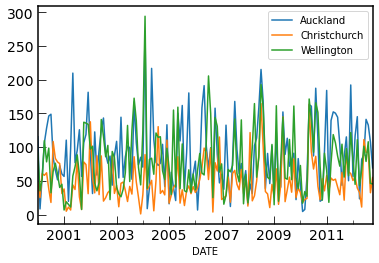

In [20]:
data2.plot()

/tmp/ipykernel_416104/2074976358.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  data2['2004'].plot()   # note for for newer versions of pandas the syntax would be : data2['2004-01-01':2024-12-01].plot()


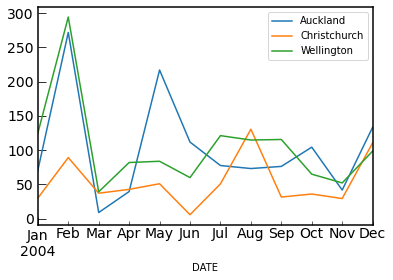

In [21]:
data2['2004'].plot()   # note for for newer versions of pandas the syntax would be : data2['2004-01-01':2024-12-01].plot()

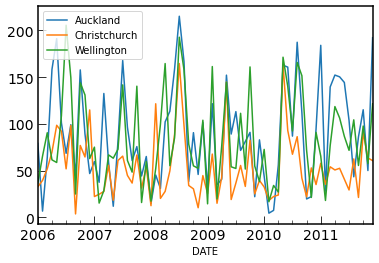

In [22]:
data2['2006':'2011'].plot()

Further accessing parts of the data. Let's plot the rainfall data of `Chirstchurch` only. 

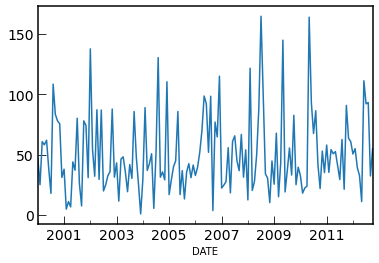

In [23]:
data2.Christchurch.plot()

Lastly, extract and show all the months for which the rainfall in Christchurch exceeded 100 mm.

In [24]:
data2[data2.Christchurch>100]

,Auckland,Christchurch,Wellington
DATE,,,
2000-08-01,84.6,108.4,64.0
2002-01-01,92.0,137.6,97.0
2004-08-01,73.0,130.4,114.6
2004-12-01,133.2,110.4,98.4
2006-12-01,47.0,115.0,63.0
2008-02-01,45.4,121.6,52.2
2008-07-01,215.2,164.6,192.8
2009-05-01,152.2,144.8,144.6
2010-05-01,162.8,163.8,171.4


## The end